<a href="https://colab.research.google.com/github/sar014/Image-Classification-using-CNN/blob/main/CNN_NN2_Updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import TensorFlow
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


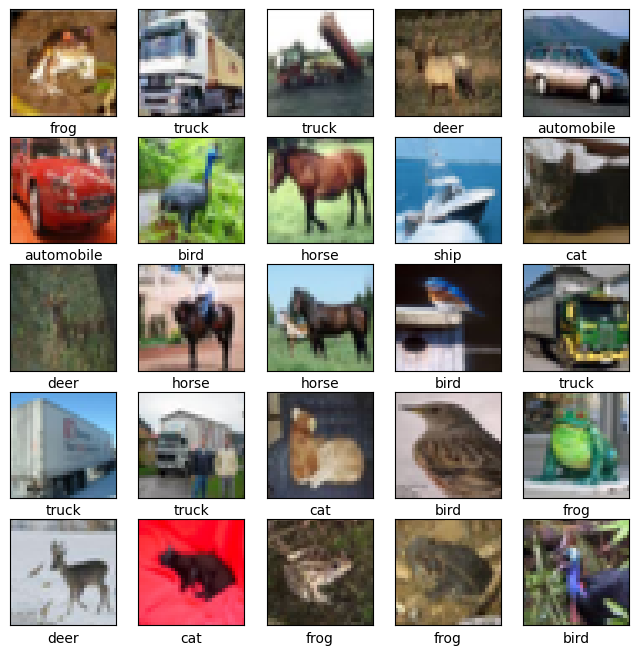

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    #which is why we need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [ ]:
def create_model(num_conv_layers=3, num_filters=32, kernel_size=(3, 3), activation='relu', num_dense_units=64, use_padding=True):
    model = models.Sequential()

    # Input layer
    if use_padding:
        model.add(layers.Conv2D(num_filters, kernel_size, activation=activation, input_shape=(32, 32, 3), padding='same'))
    else:
        model.add(layers.Conv2D(num_filters, kernel_size, activation=activation, input_shape=(32, 32, 3)))

    model.add(layers.MaxPooling2D((2, 2)))

    # Adding convolutional layers based on num_conv_layers
    for _ in range(num_conv_layers - 1):
        if use_padding:
            model.add(layers.Conv2D(num_filters * 2, kernel_size, activation=activation, padding='same'))
        else:
            model.add(layers.Conv2D(num_filters * 2, kernel_size, activation=activation))
        model.add(layers.MaxPooling2D((2, 2)))

    # Flattening the output before the dense layers
    model.add(layers.Flatten())
    model.add(layers.Dense(num_dense_units, activation=activation))
    model.add(layers.Dense(10))  # Output layer for 10 classes

    return model


In [ ]:
# Compile and train the models
def compile_and_train(model, train_images, train_labels, test_images, test_labels, epochs=10):
    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    history = model.fit(train_images, train_labels, epochs=epochs,
                        validation_data=(test_images, test_labels))
    return history

Changing Activation Layer

In [10]:
# Experiment with different architectures
model1 = create_model(num_conv_layers=3, num_filters=32, kernel_size=(3, 3), activation='relu')
model2 = create_model(num_conv_layers=3, num_filters=32, kernel_size=(3, 3), activation='tanh')
model3 = create_model(num_conv_layers=3, num_filters=32, kernel_size=(3, 3), activation='sigmoid')

In [12]:
# Train each model and store the history
history1 = compile_and_train(model1, train_images, train_labels, test_images, test_labels, epochs=10)
history2 = compile_and_train(model2, train_images, train_labels, test_images, test_labels, epochs=10)
history3 = compile_and_train(model3, train_images, train_labels, test_images, test_labels, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 126s 79ms/step - accuracy: 0.3789 - loss: 1.6978 - val_accuracy: 0.6085 - val_loss: 1.1240
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 79ms/step - accuracy: 0.6210 - loss: 1.0727 - val_accuracy: 0.6748 - val_loss: 0.9346
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 144s 80ms/step - accuracy: 0.6891 - loss: 0.8925 - val_accuracy: 0.6946 - val_loss: 0.8872
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 138s 78ms/step - accuracy: 0.7305 - loss: 0.7753 - val_accuracy: 0.7162 - val_loss: 0.8143
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 124s 79ms/step - accuracy: 0.7550 - loss: 0.7002 - val_accuracy: 0.7055 - val_loss: 0.8618
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 121s 78ms/step - accuracy: 0.7764 - loss: 0.6331 - val_accuracy: 0.7387 - val_loss: 0.7699
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 78ms/step - accuracy: 0.7993 - loss: 0.5711 - val_accuracy: 0.7271 - val_loss: 0.8034
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 79ms/step - accuracy: 

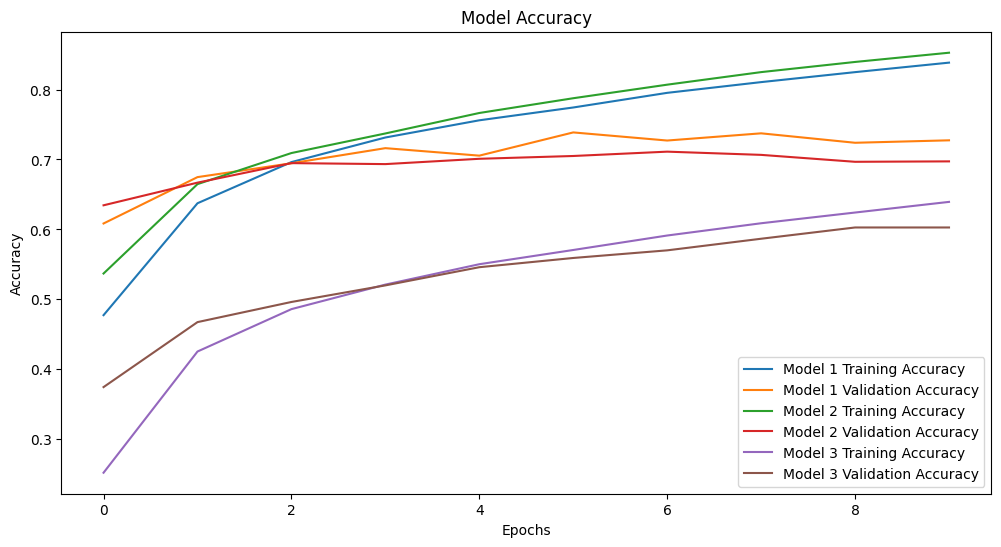

In [13]:
def plot_history(histories, titles):
    plt.figure(figsize=(12, 6))
    for history, title in zip(histories, titles):
        plt.plot(history.history['accuracy'], label=f'{title} Training Accuracy')
        plt.plot(history.history['val_accuracy'], label=f'{title} Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Plotting the training histories
plot_history([history1, history2, history3], ['Model 1', 'Model 2', 'Model 3'])

Changing num_filters

In [ ]:
# Experiment with different architectures
model4 = create_model(num_conv_layers=3, num_filters=32, kernel_size=(3, 3), activation='relu')
model5 = create_model(num_conv_layers=3, num_filters=64, kernel_size=(3, 3), activation='relu')
model6 = create_model(num_conv_layers=3, num_filters=128, kernel_size=(3, 3), activation='relu')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train each model and store the history
history4 = compile_and_train(model4, train_images, train_labels, test_images, test_labels, epochs=10)
history5 = compile_and_train(model5, train_images, train_labels, test_images, test_labels, epochs=10)
history6 = compile_and_train(model6, train_images, train_labels, test_images, test_labels, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 108s 68ms/step - accuracy: 0.5076 - loss: 1.3771 - val_accuracy: 0.6024 - val_loss: 1.1502
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 99s 63ms/step - accuracy: 0.6487 - loss: 1.0075 - val_accuracy: 0.6658 - val_loss: 0.9686
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 64ms/step - accuracy: 0.7067 - loss: 0.8445 - val_accuracy: 0.6991 - val_loss: 0.8664
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 100s 64ms/step - accuracy: 0.7373 - loss: 0.7525 - val_accuracy: 0.7064 - val_loss: 0.8529
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 64ms/step - accuracy: 0.7628 - loss: 0.6777 - val_accuracy: 0.7297 - val_loss: 0.7928
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 63ms/step - accuracy: 0.7836 - loss: 0.6163 - val_accuracy: 0.7369 - val_loss: 0.7804
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 63ms/step - accuracy: 0.8005 - loss: 0.5675 - val_accuracy: 0.7238 - val_loss: 0.8355
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 62ms/step - accuracy: 0

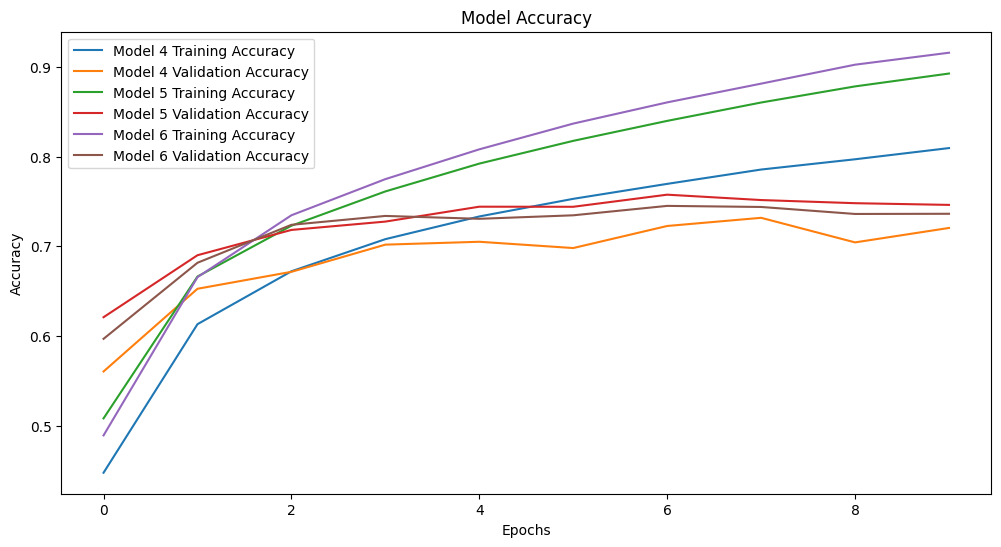

In [ ]:
def plot_history(histories, titles):
    plt.figure(figsize=(12, 6))
    for history, title in zip(histories, titles):
        plt.plot(history.history['accuracy'], label=f'{title} Training Accuracy')
        plt.plot(history.history['val_accuracy'], label=f'{title} Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Plotting the training histories
plot_history([history4, history5, history6], ['Model 4', 'Model 5', 'Model 6'])

Changing num_conv_layers

In [ ]:
# Experiment with different architectures
model7 = create_model(num_conv_layers=3, num_filters=32, kernel_size=(3, 3), activation='relu')
model8 = create_model(num_conv_layers=4, num_filters=32, kernel_size=(3, 3), activation='relu')
model9 = create_model(num_conv_layers=5, num_filters=32, kernel_size=(3, 3), activation='relu')

Adding Dense Layer

In [ ]:
model10 = create_model(num_conv_layers=3, num_filters=32, kernel_size=(3, 3), activation='relu', num_dense_units=128)